# Capítulo 8: Bibliotecas matemáticas e estatísticas

Livro: Aprendendo Química com Python, Rodrigo Q. de Albuquerque & Gerd B. da Rocha, 2021, Amazon Book.

E-Mail: learn.chem.python@gmail.com


## Versão do Python usada

In [189]:
import sys
print(sys.version)

3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]


### Caixa de sessão interativa 29: NumPy: Inversão, covariância, determinante e autovalores

In [190]:
import numpy as np
print ("Versão da NumPy", np.__version__)

Versão da NumPy 1.20.3


In [191]:
a = np.matrix([[1,2],[3,5]])            
a

matrix([[1, 2],
        [3, 5]])

In [192]:
np.linalg.inv(a)                      # matriz inversa de 'a' 

matrix([[-5.,  2.],
        [ 3., -1.]])

In [193]:
np.cov(a)                      # matriz de covariância de 'a'

array([[0.5, 1. ],
       [1. , 2. ]])

In [194]:
np.linalg.det(a)                        # determinante de 'a'

-1.0000000000000004

In [195]:
valores, vetores = np.linalg.eig(a)         # diagonalize 'a'

In [196]:
valores                                  # autovalores de 'a'

array([-0.16227766,  6.16227766])

In [197]:
vetores                                  # autovetores de 'a'

matrix([[-0.86460354, -0.36126098],
        [ 0.50245469, -0.93246475]])

### Caixa de sessão interativa 30: NumPy: Gerando dados e números aleatórios

In [198]:
np.zeros((2,3))               # variável indexada com zeros

array([[0., 0., 0.],
       [0., 0., 0.]])

In [199]:
np.ones((2,2)) * 15         # variável indexada com quinzes

array([[15., 15.],
       [15., 15.]])

In [200]:
np.identity(2)               # matriz identidade de ordem 2

array([[1., 0.],
       [0., 1.]])

In [201]:
np.random.randint(0,10,5)   # 5 números randômicos [0,10-1]

array([0, 2, 8, 7, 2])

In [202]:
np.random.random()               # 1 número randômico [0,1)

0.5110013167240836

In [203]:
np.random.random((2,3))       # variável indexada 2x3 [0,1)

array([[0.35288587, 0.93175765, 0.68621023],
       [0.44734886, 0.51320841, 0.39940777]])

In [204]:
a = np.array([1,2,3,4,5])

In [205]:
np.random.shuffle(a)           # atenção: 'a' é redefinido!
a

array([5, 3, 4, 2, 1])

In [206]:
np.linspace(0, 2, 5)              # gere 5 números de 0 a 2

array([0. , 0.5, 1. , 1.5, 2. ])

### Caixa de código 2: NumPy: Transferindo dados de/para arquivos

In [207]:
# Abra o arquivo 'a.txt' e salve-o como objeto 'data'
data = np.loadtxt('a.txt')  # cols separadas por espaço ou tab

In [208]:
data

array([[  1.1  ,   3.5  ],
       [  4.   ,   6.9  ],
       [  0.1  ,   9.5  ],
       [ 23.89 ,  67.789],
       [ -4.999,  55.456],
       [-35.   ,  34.98 ]])

In [209]:
# OBS: Rodrigo,sugiro colocar esse arquivo de dados na lista de apêndices

In [210]:
# O mesmo de cima, mas 'a.txt' está no subdiretório 'arquivos'
# data = np.loadtxt('arquivos/a.txt')

In [211]:
# Abra o arquivo 'a.csv' e salve-o como objeto 'data'
# Dentro de 'a.csv', as colunas são separadas por vírgulas
data = np.loadtxt('a.csv', delimiter = ',')

In [212]:
data

array([[  1.9    ,   7.9    ],
       [  2.9    ,  78.     ],
       [-99.7    ,  56.999  ],
       [ -2.98   , -89.45   ],
       [  0.87654,   1.     ],
       [  9.     ,   7.     ],
       [ -3.     ,   6.88   ]])

In [213]:
# Salve o conteúdo do objeto 'data' no arquivo 'output.txt'
# As colunas criadas em 'output.txt' serão separadas por espaços
np.savetxt('output.txt', data, fmt = "%s")

In [214]:
# Salve o arquivo 'output.csv', colunas separadas por vírgulas
np.savetxt('output.csv', data, fmt = "%s", delimiter = ',')

### Caixa de sessão interativa 31: Integração numérica com SciPy

In [215]:
import scipy 
print ("Versão da SciPy", scipy.__version__)

Versão da SciPy 1.6.3


In [216]:
import scipy.integrate as integral      # integração numérica 

x = [0, 0.11, 0.21, 0.31, 0.42, 0.52]   # 0-30 graus em 'rad'
y = [1, 0.99, 0.98, 0.95, 0.91, 0.87]   # y = cosseno(x)

In [217]:
integral.simps(y, x)                    # método de 'Simpson'

0.49601757575757577

In [218]:
integral.quad(np.cos, 0, 0.52)           # limites = 0 e 0.52

(0.4968801378437367, 5.51647769513038e-15)

In [219]:
def g(x):                               
    return x**2 + np.log(x + 1)

In [220]:
integral.quad(g, 2, 8)                      # limites = 2 e 8

(178.4791843300216, 1.9815169985950742e-12)

### Caixa de sessão interativa 32: Equação diferencial ordinária: cinética de 1<sup>a</sup> ordem

In [221]:
from scipy.integrate import odeint
t = np.linspace(0, 10, 101)        # 101 valores de t, [0,10] 
a0 = 0.5                                     # [A]0, em Molar

In [222]:
def f(a, t, k):                           # a = [A], k em s-1
    dadt = - k * a                # 'dadt' representa d[A]/dt
    return dadt

In [223]:
sol = odeint(f, a0, t, args = (0.5,))           # k = 0,5 s-1
sol[:3]

array([[0.5       ],
       [0.47561473],
       [0.45241873]])

### Caixa de sessão interativa 33: Pandas: uso básico

In [224]:
import pandas as pd
print("Versão do Pandas", pd.__version__)

Versão do Pandas 1.2.4


In [225]:
nomes = ['[C]', 'pH', 'T', 'Diff']
valores = [[0.1,6,20,3],[0.3,5,21,4],[0.15,6.2,18,3.5]]
data = pd.DataFrame(valores, columns = nomes)

In [226]:
data                             # objeto da classe DataFrame

,[C],pH,T,Diff
0,0.10,6.0,20,3.0
1,0.30,5.0,21,4.0
2,0.15,6.2,18,3.5


In [227]:
data.columns                             # atributo 'columns'

Index(['[C]', 'pH', 'T', 'Diff'], dtype='object')

In [228]:
data.values                               # atributo 'values'

array([[ 0.1 ,  6.  , 20.  ,  3.  ],
       [ 0.3 ,  5.  , 21.  ,  4.  ],
       [ 0.15,  6.2 , 18.  ,  3.5 ]])

In [229]:
data.describe()                     # estatística das colunas

,[C],pH,T,Diff
count,3.000000,3.000000,3.000000,3.00
mean,0.183333,5.733333,19.666667,3.50
std,0.104083,0.642910,1.527525,0.50
min,0.100000,5.000000,18.000000,3.00
25%,0.125000,5.500000,19.000000,3.25
50%,0.150000,6.000000,20.000000,3.50
75%,0.225000,6.100000,20.500000,3.75
max,0.300000,6.200000,21.000000,4.00


In [230]:
data.iloc[0,1]                 # elemento (linha 0, coluna 1)

6.0

### Caixa de código 3: Pandas: visualizando dados

In [231]:
import matplotlib.pyplot as plt

In [232]:
nomes = ['[C]', 'pH', 'T', 'Diff']
valores = [[0.1,6,20,3],[0.3,5,21,4],[0.15,6.2,18,3.5]]
data = pd.DataFrame(valores, columns = nomes)

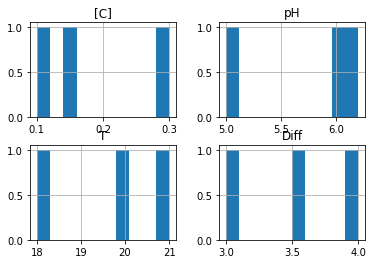

In [233]:
data.hist()
plt.show()

### Caixa de sessão interativa 34: Pandas: correlação entre colunas

In [234]:
nomes = ['[C]', 'pH', 'T', ' Diff']
valores = [[0.1, 6, 20, 3], [0.3, 5, 21, 4], [0.15, 6.2, 18, 3.5]]
data = pd.DataFrame(valores, columns = nomes)
data.corr()

,[C],pH,T,Diff
[C],1.000000,-0.921551,0.576557,0.960769
pH,-0.921551,1.000000,-0.848555,-0.777714
T,0.576557,-0.848555,1.000000,0.327327
Diff,0.960769,-0.777714,0.327327,1.000000


### Caixa de código 4: Pandas: visualizando a matriz de correlação

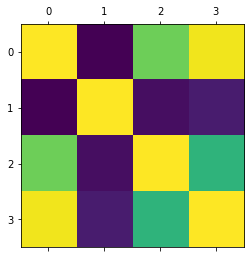

In [235]:
nomes = ['[C]', 'pH' , 'T', ' Diff']
valores = [[0.1, 6, 20, 3], [0.3, 5, 21, 4], [0.15, 6.2, 18, 3.5]]
data = pd.DataFrame(valores, columns = nomes )
correlacao = data.corr()
plt.matshow(correlacao)

### Caixa de código 5: Pandas: importando e exportando tabelas de dados

In [237]:
#data = pd.read_csv('dados.csv')      # colunas separadas por ','

In [238]:
# Se colunas estão separadas por espaços ou tabulações , use :
#data = pd.read_table('dados.txt')

In [239]:
# Para importar um arquivo do Microsoft Excel , recomendamos
# exportar os dados do excel como . csv e usar o comando da
# linha 3 acima , pois o comando abaixo pode dar erro e
# ser necessário instalar outras bibliotecas ( ex : 'xlrd ')

#data = pd.read_excel('dados.xlsx', sheet_name = 'Sheet1')

In [240]:
#data.to_csv('dados.csv', index = False)  # exporte como csv

In [241]:
#data.to_excel('dados.xlsx', index = False)  # exporte como xlsx

### Caixa de sessão interativa 35: Importando bancos de dados de bibliotecas

In [242]:
# Para instalar use pip install pydataset
# Em https://pydataset.readthedocs.io/en/latest/
from pydataset import data
iris = data('iris')

In [243]:
iris.sample(n = 5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
141,6.7,3.1,5.6,2.4,virginica
147,6.3,2.5,5.0,1.9,virginica
59,6.6,2.9,4.6,1.3,versicolor
140,6.9,3.1,5.4,2.1,virginica
5,5.0,3.6,1.4,0.2,setosa


In [244]:
iris.mean()     # média de todos os elementos de cada coluna

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [245]:
iris.std() # desvio padrão de todos os elementos (por coluna)

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [246]:
iris.shape                        # quantas linhas e colunas?

(150, 5)

### Caixa de sessão interativa 36: Trabalho de expansão isotérmica do gás ideal

In [247]:
import scipy.integrate as integral      # integração numérica 
def p(V):                                           # V em m3
    p_pascal = 1 * 8.314 * 298 / V        # pressão em Pascal
    return p_pascal / 101325                 # pressão em atm

In [248]:
integral.quad(p, 1.5e-3, 2e-3)          # expansão 'a' => 'b'

(0.007034325661075784, 7.80967031163791e-17)

In [249]:
integral.quad(p, 2e-3, 2.5e-3)          # expansão 'b' => 'c'

(0.005456246876058716, 6.057650909839469e-17)

In [250]:
>>> integral.quad(p, 2.5e-3, 3e-3)          # expansão 'c' => 'd'

(0.004458078303568831, 4.949461178203975e-17)

### Caixa de sessão interativa 37: Diagonalizando a matriz de Fock para o H<sub>2</sub>

In [251]:
f = [[-4.969, -10.062], [-10.062 , -4.969]]
fock = np.matrix(f)

In [252]:
valores, vetores = np.linalg.eig(fock)   # diagonalize 'fock'

In [253]:
valores                               # autovalores de 'fock'

array([  5.093, -15.031])

In [254]:
vetores                               # autovetores de 'fock'
# autovetor 1 = coluna 1

matrix([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]])